In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

# probabilistically selecting a sample size
samp_size = np.random.randint(400, 1000)

# probabilistically  creating the first predictor and its population coefficient
predictor_1 = np.random.normal(loc = np.random.randint(30,50), scale = np.random.randint(4, 12), 
                             size =  samp_size)
pop_co_1 = np.random.uniform(-1,1)

# probabilistically  creating the second predictor and its population coefficient
predictor_2 = np.random.gamma(shape = 2, size = samp_size)
pop_co_2 = np.random.uniform(-1,1)


# probabilistically  creating the third predictor and its population coefficient
predictor_3 = np.random.normal(loc = np.random.randint(8, 15), scale = np.random.randint(3, 8), size = samp_size)
pop_co_3 = np.random.uniform(-1,1)

# using the predictors and coefficients to create an outcome variable
odds = predictor_1*pop_co_1 + predictor_2*pop_co_2 + predictor_3*pop_co_3

pop_y = np.exp(odds)/(1+np.exp(odds))

# storing the predictors and the outcome in a dataframe
df = pd.DataFrame( {'predictor_1': predictor_1, 'predictor_2': predictor_2, 'predictor_3': predictor_3, 'outcome': pop_y})

# writing a function to map the outcome probabilities to discrete classes ( if y < 0.5, y = 0 (alive); if y > 0.5, y= 1 (dead))
def prob_to_class(x):
    
    if x > 0.5:
        x = 'dead'
       
    elif x < 0.5:
        x = 'alive'
        
    return x
  
# applying the function to the outcome
df['outcome'] = df['outcome'].apply(prob_to_class)

# calculating the proportion of the sample alive/dead
prop_alive = np.count_nonzero(df['outcome'] == 'alive')/len(df) 
prop_dead =  np.count_nonzero(df['outcome'] == 'dead')/len(df)

# ensuring that there are outcome scores in both classes
if prop_alive < 0.3 or  prop_dead < 0.3:
    while prop_alive < 0.3 or  prop_dead < 0.3:
        
        predictor_1 = np.random.normal(loc = np.random.randint(30,50), scale = np.random.randint(4, 12), 
                                    size =  samp_size)
        pop_co_1 = np.random.uniform(-0.5,0.5)


        predictor_2 = np.random.gamma(shape = 2, size = samp_size)
        pop_co_2 = np.random.uniform(-0.5,0.5)

       
        predictor_3 = np.random.normal(loc = np.random.randint(8, 15), scale = np.random.randint(3, 8), size = samp_size)
        pop_co_3 = np.random.uniform(-0.5,0.5)

        odds = predictor_1*pop_co_1 + predictor_2*pop_co_2 + predictor_3*pop_co_3 + np.random.normal(loc = 0, scale = 2, 
                                                                                                     size = samp_size)

        pop_y = np.exp(odds)/(1+np.exp(odds))

        df = pd.DataFrame( {'predictor_1': predictor_1, 'predictor_2': predictor_2, 'predictor_3': predictor_3, 'outcome': pop_y})


        df['outcome'] = df['outcome'].apply(prob_to_class)
        prop_alive = np.count_nonzero(df['outcome'] == 'alive')/len(df)
        prop_dead =  np.count_nonzero(df['outcome'] == 'dead')/len(df)

# displaying the data
display(df.head(15))

df['outcome'].replace({'alive': 0, 'dead':1}, inplace = True)

display(df.head(15))

,predictor_1,predictor_2,predictor_3,outcome
0,27.708020,0.288957,9.724076,dead
1,34.122042,0.805361,14.697202,alive
2,38.580524,4.409827,8.331216,dead
3,26.395717,3.589075,9.367354,dead
4,26.537053,2.030409,13.382965,alive
5,32.928882,1.395401,21.216045,alive
6,34.907321,3.135848,5.171962,dead
7,27.000387,4.659713,16.530125,alive
8,25.815558,1.316455,6.966784,dead
9,35.191579,1.055785,9.239394,dead


,predictor_1,predictor_2,predictor_3,outcome
0,27.708020,0.288957,9.724076,1
1,34.122042,0.805361,14.697202,0
2,38.580524,4.409827,8.331216,1
3,26.395717,3.589075,9.367354,1
4,26.537053,2.030409,13.382965,0
5,32.928882,1.395401,21.216045,0
6,34.907321,3.135848,5.171962,1
7,27.000387,4.659713,16.530125,0
8,25.815558,1.316455,6.966784,1
9,35.191579,1.055785,9.239394,1


predictor_1 Descriptive Statistics:
 count    449.000000
mean      31.272206
std        7.669968
min        7.691736
25%       26.157762
50%       30.734305
75%       36.006685
max       52.114008
Name: predictor_1, dtype: float64 



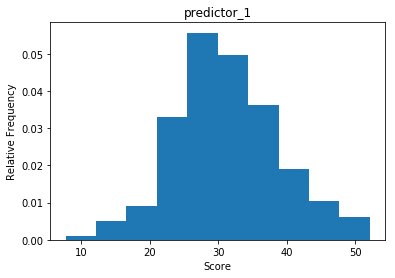

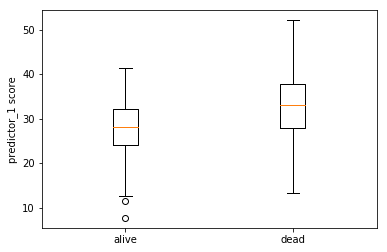

predictor_2 Descriptive Statistics:
 count    449.000000
mean       2.004294
std        1.500163
min        0.052327
25%        0.912134
50%        1.630276
75%        2.734139
max        9.383630
Name: predictor_2, dtype: float64 



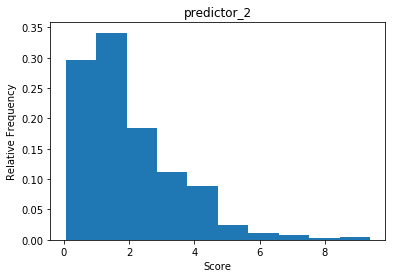

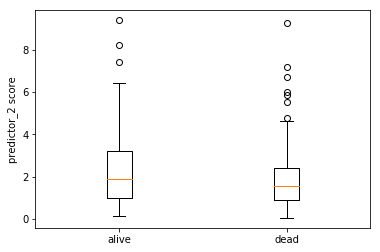

predictor_3 Descriptive Statistics:
 count    449.000000
mean       8.832797
std        5.872792
min      -11.931457
25%        4.986799
50%        9.126849
75%       12.441453
max       25.649401
Name: predictor_3, dtype: float64 



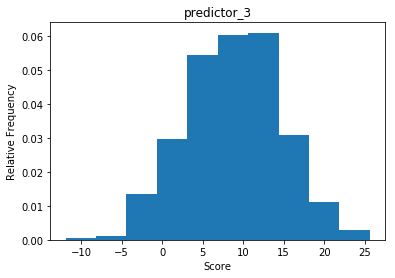

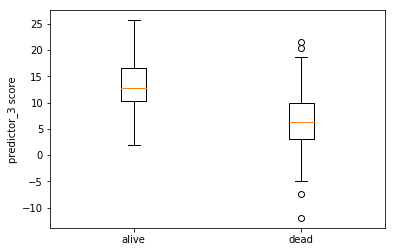

Counts for outcome (0 = alive, 1 = dead):
 1    286
0    163
Name: outcome, dtype: int64


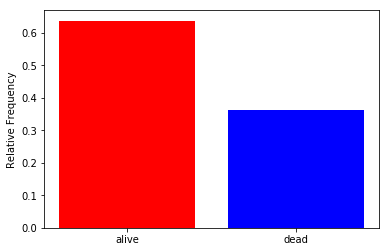

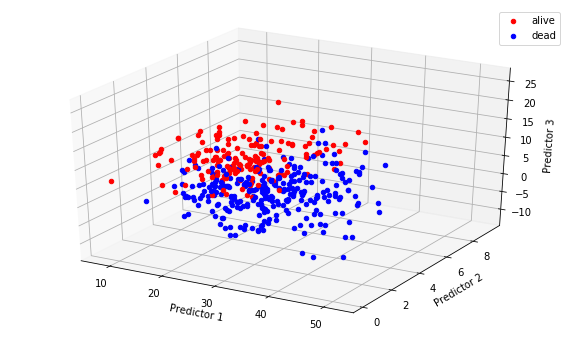

In [2]:
# subsetting the data by outcome
dead = df[df['outcome'] == 1].copy()
alive = df[df['outcome'] == 0].copy()

# plotting descriptive statistics for each predictor
for i in df.columns:
    if i != 'outcome':
        print(str(i)+' Descriptive Statistics:\n', df[i].describe(), '\n')
        plt.figure()
        plt.hist(df[i], density= True)
        plt.xlabel('Score')
        plt.ylabel('Relative Frequency')
        plt.title(str(i))
        plt.show()
        
        # plotting a boxplot of the predictor distributions, conditional on outcome
        plt.figure()
        plt.boxplot( [alive[i], dead[i]], labels = ['alive', 'dead'] )
        plt.ylabel(str(i)+' score')
        plt.show()
        
        # plotting the proportion of dead/alive in the sample
    if i == 'outcome':
        print('Counts for outcome (0 = alive, 1 = dead):\n',df[i].value_counts())
        plt.figure()
        plt.bar(['alive', 'dead'], df[i].value_counts( normalize = True), color = ['red', 'blue'])
        plt.ylabel('Relative Frequency')
        plt.show()

# creating a 3D scatter plot showing the relationship between the outcome (alive/dead) and the three predictors
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection='3d')


for i in np.arange(len(alive)):
    ax.scatter(alive['predictor_1'].iloc[i],
          alive['predictor_2'].iloc[i], alive['predictor_3'].iloc[i], color = 'red')

ax.scatter(alive['predictor_1'].iloc[i],
          alive['predictor_2'].iloc[i], alive['predictor_3'].iloc[i], color = 'red', label = 'alive')

for i in np.arange(len(dead)):    
    ax.scatter(dead['predictor_1'].iloc[i],
          dead['predictor_2'].iloc[i], dead['predictor_3'].iloc[i], color = 'blue')
    
ax.scatter(dead['predictor_1'].iloc[i],
          dead['predictor_2'].iloc[i], dead['predictor_3'].iloc[i], color = 'blue', label = 'dead')
       
    

plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
ax.set_zlabel('Predictor 3')
plt.legend()

plt.show()

In [3]:
# checking for colinearity
predictors = df[df.columns[df.columns != 'outcome']].copy()
predictors = sm.add_constant(predictors)
corr_mat = predictors.corr()

display(corr_mat)
print('Correlations between predictors greater than 0.2?:')
display(corr_mat > 0.2)


C:\Conda5\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,predictor_1,predictor_2,predictor_3
const,NaN,NaN,NaN,NaN
predictor_1,NaN,1.000000,-0.026305,-0.013409
predictor_2,NaN,-0.026305,1.000000,-0.060528
predictor_3,NaN,-0.013409,-0.060528,1.000000


Correlations between predictors greater than 0.2?:


,const,predictor_1,predictor_2,predictor_3
const,False,False,False,False
predictor_1,False,True,False,False
predictor_2,False,False,True,False
predictor_3,False,False,False,True


In [5]:
# fitting the logistic model and displaying a summary

outcome = df['outcome'].copy()

mod = sm.Logit(outcome, predictors).fit()

mod.summary()

Optimization terminated successfully.
         Current function value: 0.336291
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                  449
Model:                          Logit   Df Residuals:                      445
Method:                           MLE   Df Model:                            3
Date:                Tue, 19 Jan 2021   Pseudo R-squ.:                  0.4867
Time:                        12:49:13   Log-Likelihood:                -150.99
converged:                       True   LL-Null:                       -294.16
                                        LLR p-value:                 9.053e-62
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1850      0.683     -0.271      0.786      -1.523       1.153
predictor_1     0.1995      0.026      7.756      0.000       0.149       0.250
predictor_2    -0.4468      0.100     -4.486      0.000      -0.642      -0.252
predictor_3    -0.4383      0.044     -9.988      0.000      -0.524      -0.352
===============================================================================
"""

In [6]:
# generating predictions from the model

predictions = mod.predict(predictors)

df['predicted_outcome'] = predictions
df['predicted_outcome'] = df['predicted_outcome'].apply(prob_to_class)
df['predicted_outcome'].replace({'alive': 0, 'dead':1}, inplace = True)
display(df.head())

prop_correct = len(df[df['outcome'] == df['predicted_outcome']])/len(df)
print('Proportion of correct predictions:', prop_correct)

,predictor_1,predictor_2,predictor_3,outcome,predicted_outcome
0,27.708020,0.288957,9.724076,1,1
1,34.122042,0.805361,14.697202,0,0
2,38.580524,4.409827,8.331216,1,1
3,26.395717,3.589075,9.367354,1,0
4,26.537053,2.030409,13.382965,0,0


Proportion of correct predictions: 0.8663697104677061


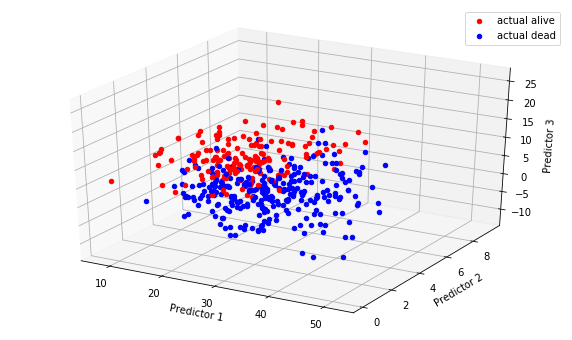

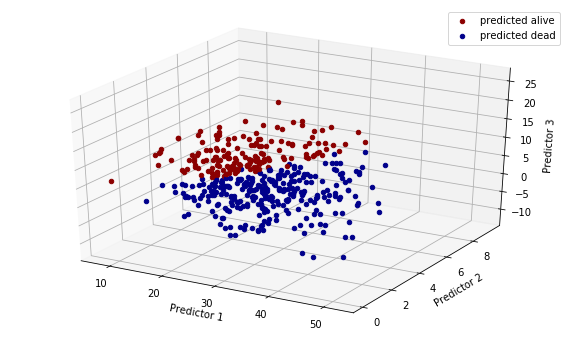

In [16]:
# creating two 3d scatterplots showing the actual and predcited outcome (dead/alive) as a function of the three predictors

# creating the first plot
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection='3d')

# plotting the actual data points
for i in np.arange(len(alive)):
    ax.scatter(alive['predictor_1'].iloc[i],
          alive['predictor_2'].iloc[i], alive['predictor_3'].iloc[i], color = 'red')

ax.scatter(alive['predictor_1'].iloc[i],
          alive['predictor_2'].iloc[i], alive['predictor_3'].iloc[i], color = 'red', label = 'actual alive')

for i in np.arange(len(dead)):    
    ax.scatter(dead['predictor_1'].iloc[i],
          dead['predictor_2'].iloc[i], dead['predictor_3'].iloc[i], color = 'blue')
    
ax.scatter(dead['predictor_1'].iloc[i],
          dead['predictor_2'].iloc[i], dead['predictor_3'].iloc[i], color = 'blue', label = 'actual dead')
       
# labelling the axes, creating a legend    
plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
ax.set_zlabel('Predictor 3')
plt.legend()

plt.show()

pred_dead = df[df['predicted_outcome'] == 1]
pred_alive = df[df['predicted_outcome'] == 0]

# creating the second plot
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection='3d')

# plotting the predicted data points
for i in np.arange(len(pred_alive)):
    ax.scatter(pred_alive['predictor_1'].iloc[i],
          pred_alive['predictor_2'].iloc[i], pred_alive['predictor_3'].iloc[i], color = 'darkred')

ax.scatter(pred_alive['predictor_1'].iloc[i],
          pred_alive['predictor_2'].iloc[i], pred_alive['predictor_3'].iloc[i], color = 'darkred', label = 'predicted alive')

for i in np.arange(len(pred_dead)):    
    ax.scatter(pred_dead['predictor_1'].iloc[i],
          pred_dead['predictor_2'].iloc[i], pred_dead['predictor_3'].iloc[i], color = 'darkblue')
    
ax.scatter(pred_dead['predictor_1'].iloc[i],
          pred_dead['predictor_2'].iloc[i], pred_dead['predictor_3'].iloc[i], color = 'darkblue', label = 'predicted dead')
       
# labelling the axes, creating a legend 
plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
ax.set_zlabel('Predictor 3')
plt.legend()

plt.show()